# **EDA Kemiringan Lahan pada setiap Kabupaten dan Kecamatan di Aceh**

##### <span style="color:green;"> Setelah menganalisis curah hujan dan deforestasi di Aceh, kali ini akan dilanjutkan dengan analisis kemiringan lahan pada tiap kecamatan Aceh. Kemiringan lahan bisa menjadi salah satu penyebab terjadinya longsor dan banjir bandang pada daerah tertentu, sehingga menyebabkan akses darat yang bisa terputus total</span>

## Import Library

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

## Load Dataset

In [26]:
slope_df = pd.read_csv("Kemiringan Lahan Aceh (Perkim)/Data Kemiringan lahan Aceh.csv")
slope_df.head()

,provinsi,kabupaten,kecamatan,indikator,nilai,satuan,kemiringan_rata2_persen,tahun,sumber
0,Aceh,Aceh Besar,Lhoong,Luas Wilayah,149.03,km2,25.0,2021,BPS Aceh Besar
1,Aceh,Aceh Besar,Lhoong,Ketinggian,18,m,25.0,2021,BPS Aceh Besar
2,Aceh,Aceh Besar,Lhoknga,Luas Wilayah,87.95,km2,25.0,2021,BPS Aceh Besar
3,Aceh,Aceh Besar,Lhoknga,Ketinggian,15,m,25.0,2021,BPS Aceh Besar
4,Aceh,Aceh Besar,Leupung,Luas Wilayah,169.15,km2,25.0,2021,BPS Aceh Besar


## Cek Struktur Dataset

In [27]:
slope_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   provinsi                 279 non-null    object 
 1   kabupaten                279 non-null    object 
 2   kecamatan                279 non-null    object 
 3   indikator                279 non-null    object 
 4   nilai                    279 non-null    object 
 5   satuan                   278 non-null    object 
 6   kemiringan_rata2_persen  279 non-null    float64
 7   tahun                    279 non-null    int64  
 8   sumber                   279 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 19.7+ KB


## Cek Kolom Dataset

In [28]:
slope_df.columns

Index(['provinsi', 'kabupaten', 'kecamatan', 'indikator', 'nilai', 'satuan',
       'kemiringan_rata2_persen', 'tahun', 'sumber'],
      dtype='object')

## Ambil kolom penting saja

In [29]:
slope_df = slope_df[
    ["provinsi", "kabupaten", "kecamatan", "kemiringan_rata2_persen", "tahun"]
]
slope_df.head()

,provinsi,kabupaten,kecamatan,kemiringan_rata2_persen,tahun
0,Aceh,Aceh Besar,Lhoong,25.0,2021
1,Aceh,Aceh Besar,Lhoong,25.0,2021
2,Aceh,Aceh Besar,Lhoknga,25.0,2021
3,Aceh,Aceh Besar,Lhoknga,25.0,2021
4,Aceh,Aceh Besar,Leupung,25.0,2021


## Drop Duplikat

In [30]:
slope_df = slope_df.drop_duplicates(
    subset=["kabupaten"]
)

slope_df.shape

(18, 5)

## Agregasi kemiringan rata-rata per kabupaten

In [31]:
slope_kab_df = (
    slope_df
    .groupby(["provinsi", "kabupaten", "tahun"], as_index=False)
    .agg(
        kemiringan_rata2_kabupaten=("kemiringan_rata2_persen", "mean"),
        jumlah_kecamatan=("kecamatan", "nunique")
    )
)

slope_kab_df.head()

,provinsi,kabupaten,tahun,kemiringan_rata2_kabupaten,jumlah_kecamatan
0,Aceh,Aceh Barat,2024,3.0,1
1,Aceh,Aceh Barat Daya,2022,8.0,1
2,Aceh,Aceh Besar,2021,25.0,1
3,Aceh,Aceh Jaya,2025,22.5,1
4,Aceh,Aceh Selatan,2024,22.5,1


## Mengkategorikan Kemiringan Lahan per Kabupaten menggunakan standar resmi

In [32]:
def kategori_kemiringan(x):
    if pd.isna(x):
        return "Data Tidak Tersedia"
    elif x < 8:
        return "Landai"
    elif x < 15:
        return "Bergelombang"
    elif x < 25:
        return "Curam"
    else:
        return "Sangat Curam"

slope_kab_df["kategori_kemiringan"] = slope_kab_df[
    "kemiringan_rata2_kabupaten"
].apply(kategori_kemiringan)

slope_kab_df[["kabupaten", "kemiringan_rata2_kabupaten", "kategori_kemiringan"]].head(100)

,kabupaten,kemiringan_rata2_kabupaten,kategori_kemiringan
0,Aceh Barat,3.0,Landai
1,Aceh Barat Daya,8.0,Bergelombang
2,Aceh Besar,25.0,Sangat Curam
3,Aceh Jaya,22.5,Curam
4,Aceh Selatan,22.5,Curam
5,Aceh Singkil,3.0,Landai
6,Aceh Tamiang,3.0,Landai
7,Aceh Tengah,30.0,Sangat Curam
8,Aceh Tenggara,20.0,Curam
9,Aceh Timur,8.0,Bergelombang


<Figure size 1200x600 with 0 Axes>

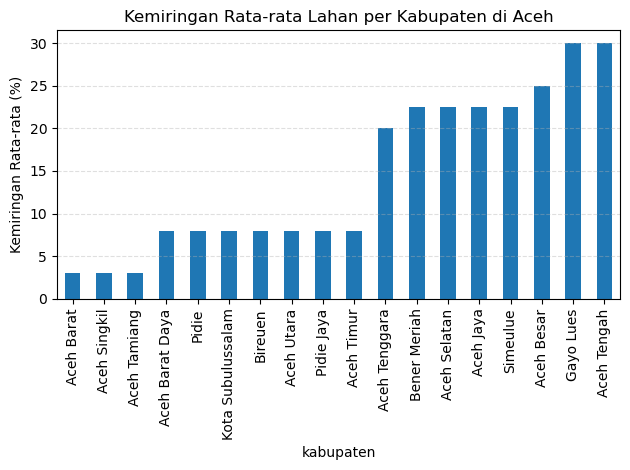

In [33]:
plt.figure(figsize=(12,6))

slope_kab_df.sort_values("kemiringan_rata2_kabupaten").plot(
    x="kabupaten",
    y="kemiringan_rata2_kabupaten",
    kind="bar",
    legend=False
)

plt.ylabel("Kemiringan Rata-rata (%)")
plt.title("Kemiringan Rata-rata Lahan per Kabupaten di Aceh")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()